In [1]:
import pandas as pd
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
image = cv2.imread('29.ppm')
image.shape

(605, 700, 3)

In [2]:
red = np.zeros(shape=(605,700))
green = np.zeros(shape=(605,700))
blue = np.zeros(shape=(605,700))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        red[i][j] = image[i][j][0]
        green[i][j] = image[i][j][1]
        blue[i][j] = image[i][j][2]

In [3]:
def bilinear_rotation(image,theta):    
    center = (image.shape[0]//2, image.shape[1]//2)
    y,x = image.shape[:2]
    original = image
    y=y-1
    x=x-1
    rotated = np.zeros(shape = (y,x))
    theta = (np.pi*theta)/180
    
    for row in range(y):
        for column in range(x):
            x_original = (column - center[1]) * np.cos(theta) - (row - center[0])*np.sin(theta) + center[1]
            y_original = (column - center[0]) * np.sin(theta) + (row - center[0])*np.cos(theta) + center[0]
            p = math.floor(y_original)
            q = math.floor(x_original)
            a = y_original - p 
            b = x_original - q
            # check compatibility
            if p>0 and p<=y and q>0 and q<=x:
                rotated[row, column] = rotated[row, column] + (1-a)*(1-b)*original[p,q]
    
            if p>0 and p<=y and q+1>0 and q+1<=x:
                rotated[row, column] = rotated[row, column] + (1-a)*b*original[p,q+1]
        
            if p+1>0 and p+1<=y and q>0 and q<=x:
                rotated[row, column] = rotated[row, column] + a*(1-b)*original[p+1,q]
    
            if p+1>0 and p+1<=y and q+1>0 and q+1<=x:
                rotated[row, column] = rotated[row, column] + a*b*original[p+1,q+1]
    
    return rotated

In [4]:
theta = 35
rotated_red = bilinear_rotation(red,theta)
rotated_green = bilinear_rotation(green,theta)
rotated_blue = bilinear_rotation(blue,theta)

In [5]:
rotated_image = np.zeros(shape=(605,700,3))

In [6]:
for i in range(rotated_red.shape[0]):
    for j in range(rotated_red.shape[1]):
        rotated_image[i][j][0] = rotated_red[i][j]
        rotated_image[i][j][1] = rotated_green[i][j]
        rotated_image[i][j][2] = rotated_blue[i][j]

In [7]:
cv2.imwrite('35_rotated.png', rotated_image)

True

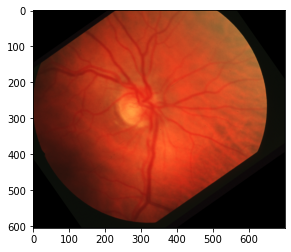

In [8]:
pil_image = Image.open('35_rotated.png')
plt.imshow(pil_image)

In [9]:
theta = -1*125
rotated_red = bilinear_rotation(red,theta)
rotated_green = bilinear_rotation(green,theta)
rotated_blue = bilinear_rotation(blue,theta)

In [10]:
rotated_image = np.zeros(shape=(605,700,3))

In [11]:
for i in range(rotated_red.shape[0]):
    for j in range(rotated_red.shape[1]):
        rotated_image[i][j][0] = rotated_red[i][j]
        rotated_image[i][j][1] = rotated_green[i][j]
        rotated_image[i][j][2] = rotated_blue[i][j]

In [12]:
cv2.imwrite('-125_rotated.png', rotated_image)

True

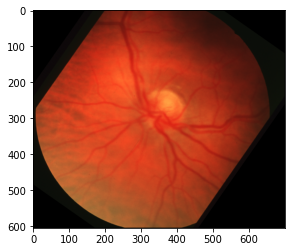

In [13]:
pil_image = Image.open('-125_rotated.png')
plt.imshow(pil_image)